In [12]:
import mysql.connector
import re

db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "rooot", # changed mysql settings but still not letting me change it just "root" so I put it to "rooot"
    database = "CSCI_620"
    )

c = db.cursor()

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

wds = pd.read_csv('wds.csv', header = 0, dtype={'source_id': str})
mwdd = pd.read_csv('mwdd.csv', header = 0, dtype={'gaiadr2': str})

df = pd.merge(wds, mwdd, left_on='source_id', right_on='gaiadr2', how='left')
df = df.dropna(subset=['age'])
# dec is a reserved word in MySQL
df.rename(columns={'dec': 'declination'}, inplace=True)
c.execute('''
    CREATE TABLE IF NOT EXISTS white_dwarfs (
        wd VARCHAR(50),
        dr2name VARCHAR(100),
        source_id BIGINT,
        teffh FLOAT,
        loggh FLOAT,
        g_gaia_mag FLOAT,
        pwd FLOAT,
        ra FLOAT,
        declination FLOAT,
        age FLOAT
    )
''')

batch_size = 100
for start in range(0, len(df), batch_size):
    end = start + batch_size
    batch = df.iloc[start:end]
    for i, row in batch.iterrows():
        row_tuple = tuple(row[['wd', 'dr2name', 'source_id', 'teffh', 'loggh', 'g_gaia_mag', 'pwd', 'ra', 'declination', 'age']])
        c.execute('''
            INSERT INTO white_dwarfs (wd, dr2name, source_id, teffh, loggh, g_gaia_mag, pwd, ra, declination, age)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ''', row_tuple)
    db.commit()



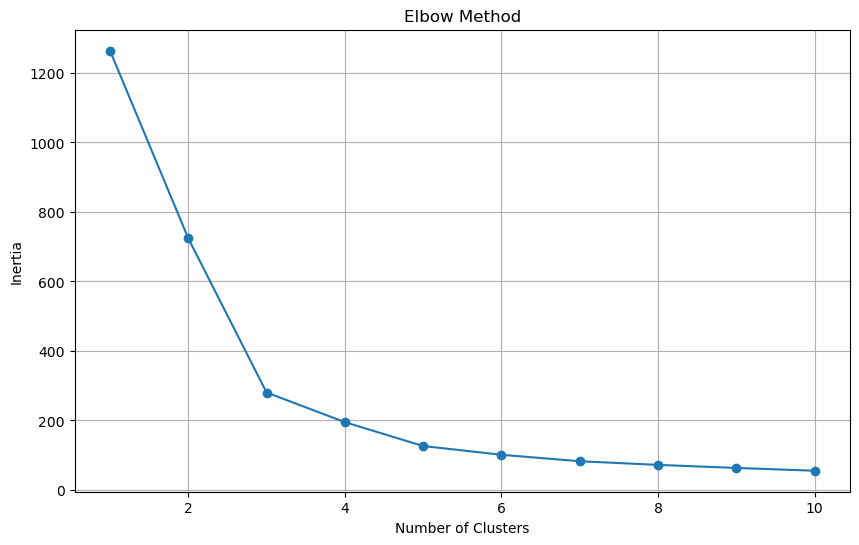

In [14]:
x_scaled = scaler.fit_transform(df[['age', 'teffh']])

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=11)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

/Users/kevin/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


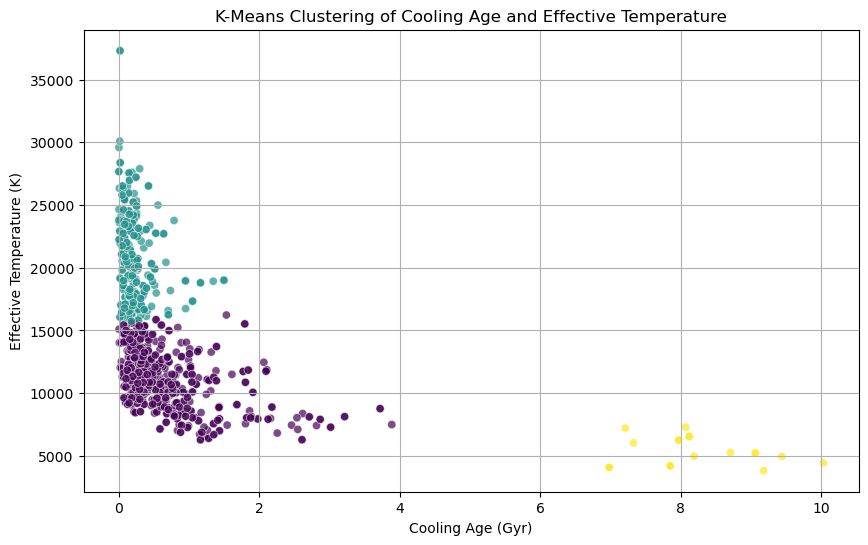

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sql_query = f"SELECT * FROM white_dwarfs LIMIT 1000"

c.execute(sql_query)
result = c.fetchall()
db.commit()
df = pd.DataFrame(result)
df.columns = [x[0] for x in c.description]

x = df[['age', 'teffh']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_scaled)

df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['teffh'], c=df['cluster'], cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.xlabel('Cooling Age (Gyr)')
plt.ylabel('Effective Temperature (K)')
plt.title('K-Means Clustering of Cooling Age and Effective Temperature')
plt.grid(True)
plt.show()

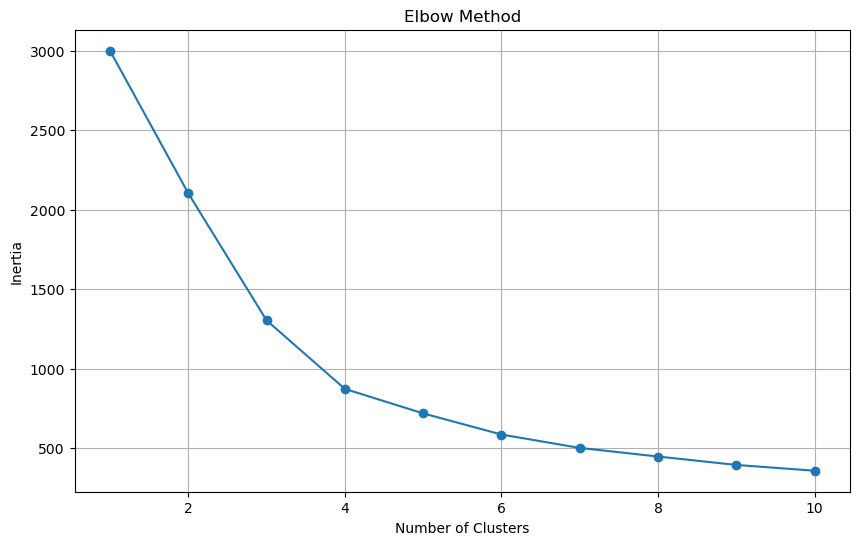

In [16]:
x = df[['age', 'teffh', 'loggh']]

x_scaled = scaler.fit_transform(x)

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=11)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

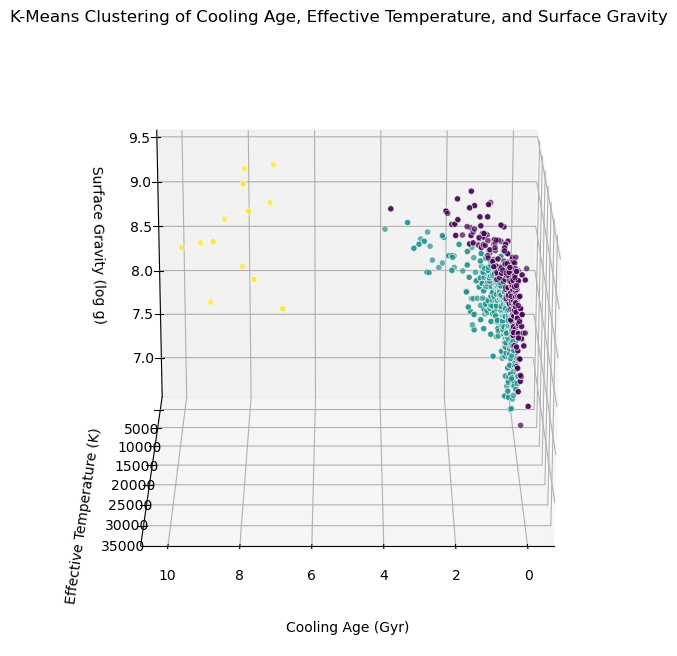

In [17]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=11)
kmeans.fit(x_scaled)
df['cluster'] = kmeans.labels_

fig = plt.figure(figsize=(12, 8))

### 111 is shorthand for dimensions in matplotlib
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['age'], df['teffh'], df['loggh'], c=df['cluster'], cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)
ax.set_xlabel('Cooling Age (Gyr)', labelpad=20)
ax.set_ylabel('Effective Temperature (K)', labelpad=20)
ax.set_zlabel('Surface Gravity (log g)', labelpad=20)
ax.set_title('K-Means Clustering of Cooling Age, Effective Temperature, and Surface Gravity')

ax.view_init(elev=20, azim=90)
plt.show()